In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Support 3D graphing

import numpy as np
import pandas as pd

from pprint import pprint

# Machine Learning - Models
from sklearn.linear_model import LinearRegression

# Machine Learning - Data Preparation
from sklearn.model_selection import train_test_split

# Machine Learning - Quantify Model Performance
from sklearn.metrics import mean_squared_error   # Mean Squared Error (MSE) metric
from sklearn.metrics import r2_score             # R-squared (Coefficient of Determination) metric

# Machine Learning - Dataset Generation
from sklearn.datasets import make_regression     # Generate linear data
from sklearn.datasets import make_s_curve        # Generate nonlinear data
from sklearn.datasets import make_blobs          # Generate blobs for classification
from sklearn.datasets import make_circles        # Generate circles for classification

# Multiple Linear Regression

In [2]:
# Generate linear data with multiple features
X, y = make_regression(n_samples=100, n_features=2, n_targets=1, random_state=0, noise=2, bias=100.0, coef=False)

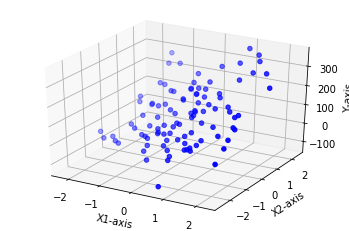

In [3]:
# Plot the dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the values
ax.scatter(X[:, 0], X[:, 1], y, c = 'b')
ax.set_xlabel('X1-axis')
ax.set_ylabel('X2-axis')
ax.set_zlabel('Y-axis')
plt.show()

In [4]:
# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 2)
(75,)
(25, 2)
(25,)


In [6]:
# Train the model with the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
print('Model - weight coefficients: ', model.coef_)
print('Model - y-axis intercept: ', model.intercept_) 

Model - weight coefficients:  [29.24754771 96.35177538]
Model - y-axis intercept:  99.76650032467171


In [8]:
# Score the resulting model vs. the test data (and the training data)
print(f"Score - Test Data: {model.score(X_test, y_test)}")
print(f"Score - Training Data: {model.score(X_train, y_train)}")

Score - Test Data: 0.999716071711789
Score - Training Data: 0.9996336450188072


In [9]:
# Create a surface representing the linear regression plane
# Calculate the min and max values of each X axis
x1_min = X[:,0].min()
x1_max = X[:,0].max()
print(x1_min, x1_max)

x2_min = X[:,1].min()
x2_max = X[:,1].max()
print(x2_min, x2_max)

-2.2234031522244266 2.240893199201458
-2.5529898158340787 2.383144774863942


In [10]:
# Create a vectors based upon the min and max values of x1 and x2
x1_vector = np.array( [x1_min, x1_max] )
x2_vector = np.array( [x2_min, x2_max] )
X1_surface, X2_surface = np.meshgrid(x1_vector, x2_vector)

In [14]:
y_p = np.array( [ model.predict( [[ x1_val, x2_val ]] ) for x1_val in np.ravel(x1_vector)for x2_val in np.ravel(x2_vector)] )
y_surface = y_p.reshape(X1_surface.shape)
y_surface

array([[-211.24769075,  264.35764059],
       [ -80.6779702 ,  394.92736115]])

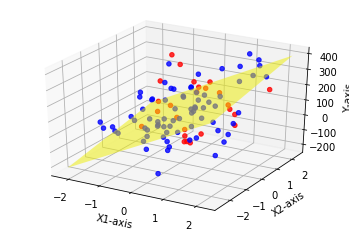

In [30]:
# Plot the dataset and the regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the linear regression plane
ax.plot_surface(X1_surface, X2_surface, y_surface, color='yellow', alpha=0.5)

# Plot the values
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c = 'b', alpha=0.8, marker="o")
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c = 'r', alpha=0.8, marker="o")

# Create axis labels
ax.set_xlabel('X1-axis')
ax.set_ylabel('X2-axis')
ax.set_zlabel('Y-axis')
plt.show()

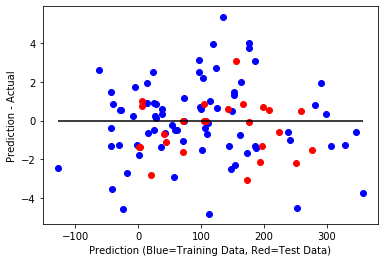

In [23]:
# Create a residuals plot: Prediction vs. (Predictions - Actual)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Plot Residuals
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(predictions_train, predictions_train - y_train, c='b')
ax.scatter(predictions_test, predictions_test - y_test, c='r')

ax.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
ax.set_xlabel('Prediction (Blue=Training Data, Red=Test Data)')
ax.set_ylabel('Prediction - Actual')

plt.show()